# **<center> Introduction to Python for Practical Problems </center>**
# **<center> New Economic School, MAE 2025 </center>**
## **<center> Section 5 </center>**

План:



In [5]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

# 1. Эконометрика в `statsmodels`

В Python существует статистическая/эконометрическая библиотека `statsmodels`, в которой можно найти множество эконометрических моделей. В этой библиотеке (как и полагается эконометрическим инструментам) присутствует инференция (в отличие от `sklearn`) и возможность получать таблички с выводом различных статистик и значимостей. В данном занятии мы будем использовать следующие модели:

* Linear Regression
* Logit/Probit

Также библиотека содержит в себе модели временных рядов - AR, MA, ARMA, ARIMA, SARIMA, ARCH и т.д. 

Наконец, таблица содержит множество стат. тестов.

## 1.1. Линейная регрессия в `statsmodels`

In [6]:
from statsmodels.api import OLS, add_constant, Logit
import statsmodels.formula.api as smf

### 1.1.1. Линейная регрессия без наворочек в `statsmodels`

Опробуем линейную регрессию из `statsmodels` на примере данных по стоимости недвижимости в Бостоне

In [7]:
house_prices = pd.read_csv('Boston_House_Prices.csv')

In [15]:
house_prices.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


Отберем вещественные переменные, создадим переменную возраста жилья (разность между датой продажи и датой постройки)

In [24]:
num_feat = house_prices.iloc[:, 5:].select_dtypes(include=['int']).columns

house_prices_num = house_prices[num_feat]
house_prices_num['BuildingAge'] = house_prices_num['YrSold'] - house_prices_num['YearBuilt']
house_prices_num.drop(['YrSold', 'YearBuilt', 'YearRemodAdd'], axis=1, inplace=True)

house_prices_num.head(3)

,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,BuildingAge
0,7,5,706,0,150,856,856,854,0,1710,...,0,61,0,0,0,0,0,2,208500,5
1,6,8,978,0,284,1262,1262,0,0,1262,...,298,0,0,0,0,0,0,5,181500,31
2,7,5,486,0,434,920,920,866,0,1786,...,0,42,0,0,0,0,0,9,223500,7


Передадим регресии наши X, а также Y в параметры `exog`, `endog`. К экзогенным переменным добавим константу с помощью `add_constant` из `statsmodels.api` (метод позволяет добавить константу к вашим данным)

Далее к регресии применим метод `fit()`, чтобы обучить/оценить модель.

Далее можно вывести результат с помощью метода `.summary()` или метода `.summary2()`, взяв еще поверх `print`

In [25]:
from statsmodels.api import OLS, add_constant, Logit, Probit
import statsmodels.formula.api as smf

In [26]:
exog_features = ['BuildingAge', 'GrLivArea', 'GarageArea', 'PoolArea', 'BsmtFullBath']

exog = house_prices_num[exog_features]

endog = house_prices_num['SalePrice']

ols_reg = OLS(endog=endog, exog=add_constant(exog)).fit()

print(ols_reg.summary2())

                    Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.697     
Dependent Variable:   SalePrice         AIC:                 35352.7968
Date:                 2024-04-08 17:41  BIC:                 35384.5140
No. Observations:     1460              Log-Likelihood:      -17670.   
Df Model:             5                 F-statistic:         671.6     
Df Residuals:         1454              Prob (F-statistic):  0.00      
R-squared:            0.698             Scale:               1.9136e+09
-----------------------------------------------------------------------
               Coef.     Std.Err.    t     P>|t|    [0.025     0.975]  
-----------------------------------------------------------------------
const        38687.5236 4802.8314   8.0551 0.0000 29266.3045 48108.7428
BuildingAge   -770.0511   43.4542 -17.7210 0.0000  -855.2906  -684.8115
GrLivArea       83.8784    2.5062  33.4677 0.0000    78.9621    88.7946
GarageArea  

В обучении (fit'e) укажем стандартные ошибки в форме Уайта - HC0 (можно пробовать и другие)

In [27]:
add_constant(exog)

,const,BuildingAge,GrLivArea,GarageArea,PoolArea,BsmtFullBath
0,1.0,5,1710,548,0,1
1,1.0,31,1262,460,0,0
2,1.0,7,1786,608,0,1
3,1.0,91,1717,642,0,1
4,1.0,8,2198,836,0,1
...,...,...,...,...,...,...
1455,1.0,8,1647,460,0,0
1456,1.0,32,2073,500,0,1
1457,1.0,69,2340,252,0,0
1458,1.0,60,1078,240,0,1


In [28]:
exog_features = ['BuildingAge', 'GrLivArea', 'GarageArea', 'PoolArea', 'BsmtFullBath']

exog = house_prices_num[exog_features]

endog = house_prices_num['SalePrice']

ols_reg = OLS(endog=endog, exog=add_constant(exog)).fit(cov_type='HC0')

print(ols_reg.summary2())

                    Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.697     
Dependent Variable:   SalePrice         AIC:                 35352.7968
Date:                 2024-04-08 17:41  BIC:                 35384.5140
No. Observations:     1460              Log-Likelihood:      -17670.   
Df Model:             5                 F-statistic:         256.0     
Df Residuals:         1454              Prob (F-statistic):  2.15e-196 
R-squared:            0.698             Scale:               1.9136e+09
-----------------------------------------------------------------------
               Coef.     Std.Err.    z     P>|z|    [0.025     0.975]  
-----------------------------------------------------------------------
const        38687.5236 9971.7954   3.8797 0.0001 19143.1638 58231.8834
BuildingAge   -770.0511   43.5257 -17.6919 0.0000  -855.3600  -684.7422
GrLivArea       83.8784    6.1320  13.6789 0.0000    71.8599    95.8968
GarageArea  

### 1.1.2. Линейная регрессия в `statsmodels` с синтаксисом как в `R`

А теперь попробуем перейти к R-like нотации, где мы прописываем формулу спецификации (импортировали для этого `statsmodels.formula.api` как `smf`). Константа идет по дефолту, однако ее можно убрать путем вычитания 1. Также внутри формулы можно делать преобразования переменных, как будет показано ниже. Также можно категориальные переменные переводить в дамми переменные накидыванием C() поверх вашей переменной.

In [29]:
exog_features = ['BuildingAge', 'GrLivArea', 'GarageArea', 'PoolArea', 'BsmtFullBath']

specification = 'SalePrice ~ BuildingAge + GrLivArea + PoolArea + GarageArea + C(BsmtFullBath)'

ols_reg = smf.ols(formula=specification, data=house_prices_num).fit(cov_type='HC1')

print(ols_reg.summary2())

                         Results: Ordinary least squares
Model:                    OLS                  Adj. R-squared:         0.698     
Dependent Variable:       SalePrice            AIC:                    35349.4196
Date:                     2024-04-08 17:41     BIC:                    35391.7091
No. Observations:         1460                 Log-Likelihood:         -17667.   
Df Model:                 7                    F-statistic:            237.7     
Df Residuals:             1452                 Prob (F-statistic):     1.68e-235 
R-squared:                0.699                Scale:                  1.9066e+09
---------------------------------------------------------------------------------
                       Coef.     Std.Err.     z     P>|z|     [0.025     0.975]  
---------------------------------------------------------------------------------
Intercept            37407.5746  9142.5630   4.0916 0.0000  19488.4804 55326.6687
C(BsmtFullBath)[T.1] 20282.5645  2346.158

Вот здесь мы пробуем применять трансформации внутри формул

In [30]:
specification = 'np.log(SalePrice + 1) ~ np.log(BuildingAge + 1) + np.square(GrLivArea)'

ols_reg = smf.ols(formula=specification, data=house_prices_num).fit(cov_type='HC1')

print(ols_reg.summary2())

                    Results: Ordinary least squares
Model:               OLS                   Adj. R-squared:     0.605    
Dependent Variable:  np.log(SalePrice + 1) AIC:                111.0966 
Date:                2024-04-08 17:41      BIC:                126.9551 
No. Observations:    1460                  Log-Likelihood:     -52.548  
Df Model:            2                     F-statistic:        492.0    
Df Residuals:        1457                  Prob (F-statistic): 5.46e-164
R-squared:           0.605                 Scale:              0.063049 
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Intercept               12.2386   0.0488 250.7323 0.0000 12.1429 12.3342
np.log(BuildingAge + 1) -0.1518   0.0053 -28.8585 0.0000 -0.1621 -0.1415
np.square(GrLivArea)     0.0000   0.0000   5.5176 0.0000  0.0000  0.0000

### 1.1.3. Поточечный прогноз для временного ряда

Также можно сделать прогноз - точечный и интервальный с выбранным уровнем доверия.

Вернемся к данным по ценам на акции *Apple*.

Возьмем несколько переменных - 'Close' и 'Close_lag20', которую мы создали как лаг 'Close' 20-го порядка. Лагом является значение этой переменной 20 периодов назад.

Если хотите взять лид (lead), то нужно поставить минус в `.shift()`: `.shift(-n)`

Лаги можно брать по группам (с `groupby` выражением), если требуется взять значение за сколько-то периодов в прошлом для определенной группы (например, по регионам/городам/магазинам/людям)

Также можно вычислять различные скользящие статистика с помощью метода `.rolling(window_length, ..)` и применяя поверх нужную статистику

In [33]:
import yfinance as yf

In [34]:
aapl = yf.Ticker("AAPL").history(start="2000-01-01").reset_index()
aapl['Date'] = pd.to_datetime(aapl['Date'].dt.date)
aapl.set_index('Date', inplace=True)

aapl.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03,0.792742,0.850379,0.768648,0.846127,535796800,0.0,0.0
2000-01-04,0.818254,0.836206,0.764869,0.774790,512377600,0.0,0.0
2000-01-05,0.784238,0.835733,0.778569,0.786128,778321600,0.0,0.0
2000-01-06,0.802191,0.808804,0.718097,0.718097,767972800,0.0,0.0
2000-01-07,0.729436,0.763452,0.721878,0.752113,460734400,0.0,0.0


In [35]:
aapl['Close_LR'] = np.log(aapl['Close']).diff()

aapl['Close_EWMA50'] = aapl['Close'].ewm(alpha=0.2, min_periods=50).mean()
aapl['Close_EWMA100'] = aapl['Close'].ewm(alpha=0.2, min_periods=100).mean()

aapl['Close_MA50'] = aapl['Close'].rolling(50).mean()
aapl['Close_MA100'] = aapl['Close'].rolling(100).mean()

aapl['Close_Vol_EWMA50'] = np.sqrt(aapl['Close_LR'].apply(np.square).ewm(alpha=0.2, min_periods=50).mean())
aapl['Close_Vol_EWMA100'] = np.sqrt(aapl['Close_LR'].apply(np.square).ewm(alpha=0.2, min_periods=100).mean())

aapl['Close_Vol_MA50'] = aapl['Close_LR'].rolling(50).std()
aapl['Close_Vol_MA100'] = aapl['Close_LR'].rolling(100).std()

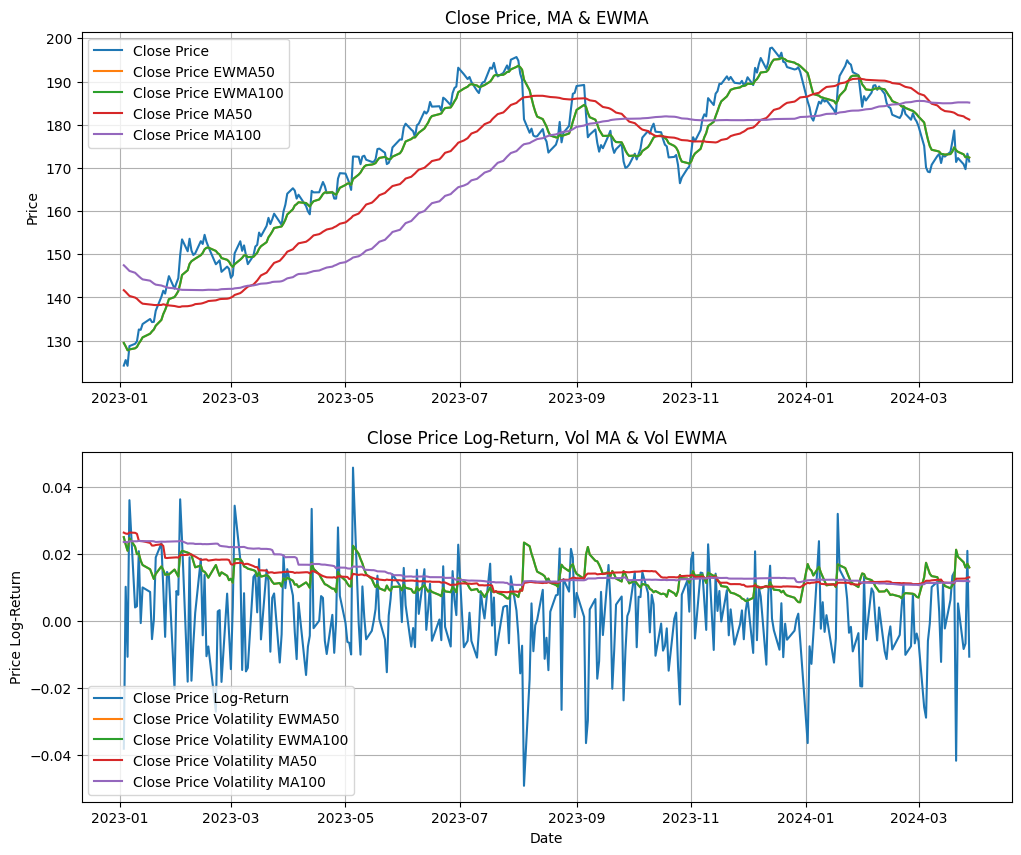

In [36]:
fig, ax = plt.subplots(2,1, figsize=(12,10))

start = '2023-01-01'
end = '2024-03-31'

ax[0].plot(aapl['Close'][start:end], label='Close Price')
ax[0].plot(aapl['Close_EWMA50'][start:end], label='Close Price EWMA50')
ax[0].plot(aapl['Close_EWMA100'][start:end], label='Close Price EWMA100')
ax[0].plot(aapl['Close_MA50'][start:end], label='Close Price MA50')
ax[0].plot(aapl['Close_MA100'][start:end], label='Close Price MA100')

ax[0].set_ylabel('Price')
ax[0].set_title('Close Price, MA & EWMA')
ax[0].legend()
ax[0].grid()

ax[1].plot(aapl['Close_LR'][start:end], label='Close Price Log-Return')
ax[1].plot(aapl['Close_Vol_EWMA50'][start:end], label='Close Price Volatility EWMA50')
ax[1].plot(aapl['Close_Vol_EWMA100'][start:end], label='Close Price Volatility EWMA100')
ax[1].plot(aapl['Close_Vol_MA50'][start:end], label='Close Price Volatility MA50')
ax[1].plot(aapl['Close_Vol_MA100'][start:end], label='Close Price Volatility MA100')

ax[1].set_ylabel('Price Log-Return')
ax[1].set_xlabel('Date')
ax[1].set_title('Close Price Log-Return, Vol MA & Vol EWMA')
ax[1].legend()
ax[1].grid()

None

In [37]:
aapl['Close_lag20'] = aapl['Close'].shift(20)
aapl['Close_EWMA50_lag1'] = aapl['Close_EWMA50'].shift(1)
aapl['Close_Vol_EWMA50_lag1'] = aapl['Close_Vol_EWMA50'].shift(1)

Попробуем построить регрессию для абсолютных значений цены закрытия

In [38]:
specification = 'Close ~ Close_lag20'

ols_reg = smf.ols(formula=specification, data=aapl).fit(cov_type='HC1')

print(ols_reg.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.992     
Dependent Variable: Close            AIC:                36361.0397
Date:               2024-04-08 17:43 BIC:                36374.4665
No. Observations:   6084             Log-Likelihood:     -18179.   
Df Model:           1                F-statistic:        1.726e+05 
Df Residuals:       6082             Prob (F-statistic): 0.00      
R-squared:          0.992            Scale:              23.065    
---------------------------------------------------------------------
              Coef.    Std.Err.      z       P>|z|    [0.025   0.975]
---------------------------------------------------------------------
Intercept     0.3437     0.0390     8.8223   0.0000   0.2673   0.4200
Close_lag20   1.0061     0.0024   415.5033   0.0000   1.0014   1.0109
-------------------------------------------------------------------
Omnibus:             1008.225      Durbin-Watson:       

Теперь построим регрессию для логарифмов (приростов) значения цены закрытия

In [39]:
specification = 'np.log1p(Close) ~ np.log1p(Close_lag20)'

ols_reg = smf.ols(formula=specification, data=aapl).fit(cov_type='HC1')

print(ols_reg.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.998      
Dependent Variable: np.log1p(Close)  AIC:                -14056.6591
Date:               2024-04-08 17:43 BIC:                -14043.2322
No. Observations:   6084             Log-Likelihood:     7030.3     
Df Model:           1                F-statistic:        3.134e+06  
Df Residuals:       6082             Prob (F-statistic): 0.00       
R-squared:          0.998            Scale:              0.0058073  
--------------------------------------------------------------------
                      Coef.  Std.Err.     z     P>|z|  [0.025 0.975]
--------------------------------------------------------------------
Intercept             0.0126   0.0016    7.7388 0.0000 0.0094 0.0158
np.log1p(Close_lag20) 1.0010   0.0006 1770.3221 0.0000 0.9999 1.0021
--------------------------------------------------------------------
Omnibus:             1168.340       Durbin-Watson:   

Попробуем теперь добавить больше регрессоров и разделим выборку на тренировочную и тестовую

In [40]:
aapl_train = aapl[:'2024-01-01']
aapl_test = aapl['2024-01-01':]

# specification = 'Close ~ Close_lag20 + Close_EWMA50_lag1 + Close_Vol_EWMA50_lag1'
specification = 'np.log(Close) ~ np.log(Close_lag20) + np.log(Close_EWMA50_lag1) + Close_Vol_EWMA50_lag1'

ols_reg = smf.ols(formula=specification, data=aapl_train).fit(cov_type='HC1')

print(ols_reg.summary2())

                     Results: Ordinary least squares
Model:                OLS                Adj. R-squared:       1.000      
Dependent Variable:   np.log(Close)      AIC:                  -22282.5889
Date:                 2024-04-08 17:43   BIC:                  -22255.8001
No. Observations:     5986               Log-Likelihood:       11145.     
Df Model:             3                  F-statistic:          5.144e+06  
Df Residuals:         5982               Prob (F-statistic):   0.00       
R-squared:            1.000              Scale:                0.0014145  
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                  0.0249   0.0050   4.9432 0.0000  0.0150  0.0348
np.log(Close_lag20)       -0.1507   0.0102 -14.8075 0.0000 -0.1707 -0.1308
np.log(Close_EWMA50_lag1)  1.1486   0.0105 109.

С помощью мтеода `predict(X)` сделаем точечное предсказание. С помощью метода `get_prediction(X)` получим более обширные детали по предсказанию (однако без исходных индексов). Далее можно взять от объекта, созданного с помощью `get_prediction(X)` метод `.conf_int(..)`, который выдаст массив из нижней и верхней границ доверительного интервала.

Далее построим график с прогнозом и доверительным интервалом. Красным пометим фактическое значение.

In [41]:
prediction_point = ols_reg.predict(aapl_test)

prediction_conf_low = ols_reg.get_prediction(aapl_test).conf_int(alpha=0.01)[:,0]
prediction_conf_up = ols_reg.get_prediction(aapl_test).conf_int(alpha=0.01)[:,1]

prediction_conf_up = pd.Series(prediction_conf_up, index=prediction_point.index)
prediction_conf_low = pd.Series(prediction_conf_low, index=prediction_point.index)

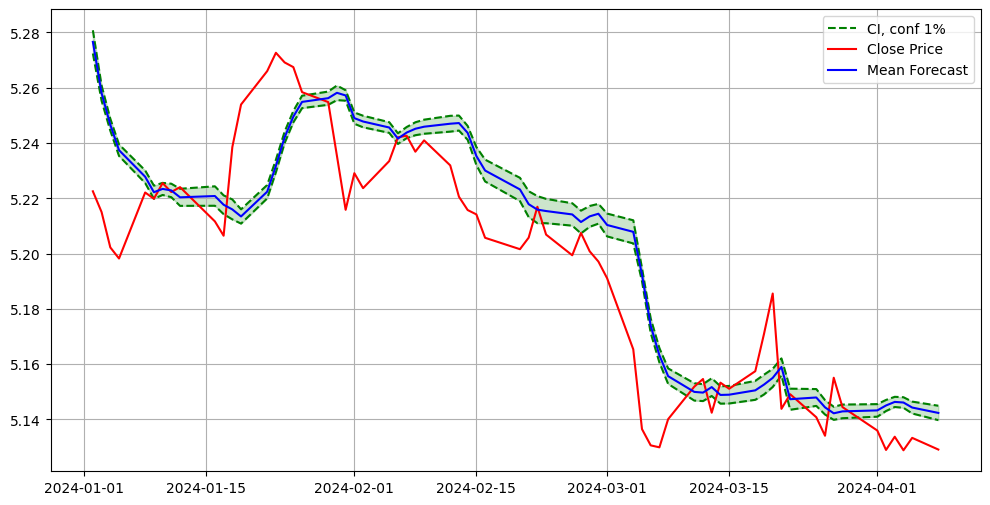

In [42]:
plt.figure(figsize=(12,6))

plt.plot(prediction_conf_up, label='CI, conf 1%', color='green', linestyle='dashed')
plt.plot(prediction_conf_low, color='green', linestyle='dashed')
plt.fill_between(aapl_test.index, prediction_conf_low, prediction_conf_up, color='green', alpha=0.2)

plt.plot(np.log(aapl_test['Close']), label='Close Price', color='red')
plt.plot(prediction_point, label='Mean Forecast', color='blue')

plt.legend()
plt.tick_params()

plt.grid()

None

## 1.2. Логистическая регрессия

А теперь посмотрим, как работают классификационные модели на примере логистической регрессии. Использовать будем данные по кредитным картам и дефолтам на них.

In [43]:
titanic = pd.read_csv('titanic.csv')
titanic_nonans = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].dropna()

In [44]:
titanic_nonans.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


Пол и класс выделим как дамми-переменные через `C()`

In [45]:
specification = 'Survived ~ Age + C(Sex) + C(Pclass) + np.log1p(Fare)'

logit_reg1 = smf.logit(formula=specification, data=titanic_nonans).fit()

print(logit_reg1.summary2())

Optimization terminated successfully.
         Current function value: 0.453066
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: Survived         Pseudo R-squared: 0.329     
Date:               2024-04-08 17:43 AIC:              658.9780  
No. Observations:   714              BIC:              686.4032  
Df Model:           5                Log-Likelihood:   -323.49   
Df Residuals:       708              LL-Null:          -482.26   
Converged:          1.0000           LLR p-value:      1.6947e-66
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         4.1566   0.7980   5.2089 0.0000  2.5926  5.7206
C(Sex)[T.male]   -2.5447   0.2114 -12.0367 0.0000 -2.9590 -2.1303


Также создадим пересечение переменных с помощью `*` как в примере ниже

In [46]:
specification = 'Survived ~ Age + C(Sex) + Age * C(Sex) + C(Pclass) + np.log1p(Fare)'

logit_reg2 = smf.logit(formula = specification, data=titanic_nonans).fit()

print(logit_reg2.summary2())

Optimization terminated successfully.
         Current function value: 0.444210
         Iterations 6
                          Results: Logit
Model:               Logit            Method:           MLE       
Dependent Variable:  Survived         Pseudo R-squared: 0.342     
Date:                2024-04-08 17:43 AIC:              648.3322  
No. Observations:    714              BIC:              680.3284  
Df Model:            6                Log-Likelihood:   -317.17   
Df Residuals:        707              LL-Null:          -482.26   
Converged:           1.0000           LLR p-value:      2.7618e-68
No. Iterations:      6.0000           Scale:            1.0000    
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept           3.8013   0.8151  4.6638 0.0000  2.2038  5.3988
C(Sex)[T.male]     -1.1476   0.4385 -2.6172 0.0089 -2

## 1.3. Вывод информации о регрессии с использованием встроеных методов `statsmodels`

В примере ниже можно увидеть способ вывода результирующей регрессионной таблички в latex. Вам требуется выбрать нужную Вам.

In [47]:
print(logit_reg1.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}   &     Survived     & \textbf{  No. Observations:  } &      714    \\
\textbf{Model:}           &      Logit       & \textbf{  Df Residuals:      } &      708    \\
\textbf{Method:}          &       MLE        & \textbf{  Df Model:          } &        5    \\
\textbf{Date:}            & Mon, 08 Apr 2024 & \textbf{  Pseudo R-squ.:     } &   0.3292    \\
\textbf{Time:}            &     17:43:41     & \textbf{  Log-Likelihood:    } &   -323.49   \\
\textbf{converged:}       &       True       & \textbf{  LL-Null:           } &   -482.26   \\
\textbf{Covariance Type:} &    nonrobust     & \textbf{  LLR p-value:       } & 1.695e-66   \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                        & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}      &       4.1566  &        0.798     &     5.209  &         0.000        

Проблема этого метода заключается в том, что он почти невариативен, и мы не можем кастомизировать таблицы.

Исправить это может библиотека `stargazer`

## 1.4. Вывод информации о регрессии с библиотекой `Stargazer`

Можно вывести таблицу в latex с помощью пакета `stargazer`. Эта библиотека позволяет выводить таблицы с информацией о регрессии как в `R`.

Подробно прочитать про `stargazer` можно [тут](https://github.com/StatsReporting/stargazer/tree/master).

In [51]:
# pip install stargazer

In [52]:
from stargazer.stargazer import Stargazer

### 1.4.1. Quick Start с `Stargazer`

In [53]:
stargazer_res = Stargazer([logit_reg1, logit_reg2])

stargazer_res

In [54]:
print(stargazer_res.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{2}{c}{\textit{Dependent variable: Survived}} \
\cr \cline{2-3}
\\[-1.8ex] & (1) & (2) \\
\hline \\[-1.8ex]
 Age & -0.038$^{***}$ & -0.008$^{}$ \\
& (0.008) & (0.012) \\
 Age:C(Sex)[T.male] & & -0.052$^{***}$ \\
& & (0.015) \\
 C(Pclass)[T.2] & -1.407$^{***}$ & -1.698$^{***}$ \\
& (0.329) & (0.358) \\
 C(Pclass)[T.3] & -2.719$^{***}$ & -2.964$^{***}$ \\
& (0.378) & (0.396) \\
 C(Sex)[T.male] & -2.545$^{***}$ & -1.148$^{***}$ \\
& (0.211) & (0.438) \\
 Intercept & 4.157$^{***}$ & 3.801$^{***}$ \\
& (0.798) & (0.815) \\
 np.log1p(Fare) & -0.082$^{}$ & -0.156$^{}$ \\
& (0.149) & (0.152) \\
\hline \\[-1.8ex]
 Observations & 714 & 714 \\
 Pseudo $R^2$ & 0.329 & 0.342 \\
\hline
\hline \\[-1.8ex]
\textit{Note:} & \multicolumn{2}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\
\end{tabular}
\end{table}


### 1.4.2. Использование `Stargazer` с дополнительными параметрами

Подробно про наворочки от `Stargazer` с примерами можно прочитать [тут](https://github.com/StatsReporting/stargazer/blob/master/examples.ipynb).

А мы пока пошаманим над нашей таблицей.

In [55]:
# Изменим заголовок таблицы
stargazer_res.title('Titanic Survival Study')

# Изменим названия моделей
stargazer_res.custom_columns(['Model 1', 'Model 2'], [1, 1])

# Изменим число цифр после запятой
stargazer_res.significant_digits(3)

# Изменим порядок отображения регрессоров
stargazer_res.covariate_order(['Intercept',
                               'Age', 
                               'C(Sex)[T.male]', 
                               'Age:C(Sex)[T.male]',
                               'np.log1p(Fare)', 
                               'C(Pclass)[T.2]', 
                               'C(Pclass)[T.3]'])

# Изменим имена регрессоров
stargazer_res.rename_covariates({'Age:C(Sex)[T.male]': 'Age * Male Dummy',
                                 'C(Pclass)[T.2]': 'Pclass(2) Dummy',
                                 'C(Pclass)[T.3]': 'Pclass(3) Dummy',
                                 'C(Sex)[T.male]': 'Male Dummy',
                                 'np.log1p(Fare)': 'log(Fare)'})

# Добавим нотацию к таблице
stargazer_res.add_custom_notes(['Errors are non-robust'])


In [56]:
stargazer_res

In [57]:
print(stargazer_res.render_latex())

\begin{table}[!htbp] \centering
  \caption{Titanic Survival Study}
\begin{tabular}{@{\extracolsep{5pt}}lcc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{2}{c}{\textit{Dependent variable: Survived}} \
\cr \cline{2-3}
\\[-1.8ex] & \multicolumn{1}{c}{Model 1} & \multicolumn{1}{c}{Model 2}  \\
\\[-1.8ex] & (1) & (2) \\
\hline \\[-1.8ex]
 Intercept & 4.157$^{***}$ & 3.801$^{***}$ \\
& (0.798) & (0.815) \\
 Age & -0.038$^{***}$ & -0.008$^{}$ \\
& (0.008) & (0.012) \\
 Male Dummy & -2.545$^{***}$ & -1.148$^{***}$ \\
& (0.211) & (0.438) \\
 Age * Male Dummy & & -0.052$^{***}$ \\
& & (0.015) \\
 log(Fare) & -0.082$^{}$ & -0.156$^{}$ \\
& (0.149) & (0.152) \\
 Pclass(2) Dummy & -1.407$^{***}$ & -1.698$^{***}$ \\
& (0.329) & (0.358) \\
 Pclass(3) Dummy & -2.719$^{***}$ & -2.964$^{***}$ \\
& (0.378) & (0.396) \\
\hline \\[-1.8ex]
 Observations & 714 & 714 \\
 Pseudo $R^2$ & 0.329 & 0.342 \\
\hline
\hline \\[-1.8ex]
\textit{Note:} & \multicolumn{2}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$

# 2. Разбивка выборки на тренировочную и тестовую

Поигрались, и хватит. При использовании регрессионных и вообще любых моделей, которые могут что-то предсказывать, необходимо использовать разбиение на тренировочную и тестовую выборки, чтобы была возможность проверять перфоманс модели на отложенных данных и то, не переобучилась ли она.

Для обычных регрессионных моделей мы будем использовать выборку с жильем в Бостоне. Для моделей классификации - датасет титаника.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [63]:
exog_features = ['BuildingAge', 'GrLivArea', 'GarageArea', 'PoolArea', 'BsmtFullBath']

X_hp = house_prices_num[exog_features]
y_hp = house_prices_num['SalePrice']

X_train_hp, X_test_hp, y_train_hp, y_test_hp = train_test_split(X_hp,
                                                                y_hp,
                                                                test_size=0.3, 
                                                                random_state=42, 
                                                                shuffle=True)

In [64]:
ohe = OneHotEncoder()

titanic_nonans['Ones'] = 1
titanic_nonans['Male_Dummy'] = ohe.fit_transform(titanic_nonans['Sex'].values.reshape(-1,1)).toarray()[:,1]
titanic_nonans['Male_Age'] = titanic_nonans['Male_Dummy'] * titanic_nonans['Age']
titanic_nonans['log_Fare'] = np.log1p(titanic_nonans['Fare'])
titanic_nonans['Pclass_2'] = (titanic_nonans['Pclass'] == 2).apply(lambda x: int(x))
titanic_nonans['Pclass_3'] = (titanic_nonans['Pclass'] == 3).apply(lambda x: int(x))

X_titanic = titanic_nonans[['Ones', 'Pclass_2', 'Pclass_3', 'Male_Dummy', 'Age', 'Male_Age', 'log_Fare']]
y_titanic = titanic_nonans['Survived']

X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic,
                                                                                    y_titanic,
                                                                                    test_size=0.3, 
                                                                                    random_state=42, 
                                                                                    shuffle=True)

# X_train_titanic_transform = ohe.fit_transform(X_train_titanic[['Pclass']])
# X_test_titanic_transform = ohe.fit_transform(X_test_titanic[['Pclass']])

# 3. Эконометрика в `sklearn`

## 3.1. Линейная регрессия

In [65]:
from sklearn.metrics import mean_squared_error

### 3.1.1. Простая линейная регрессия

Подробнее смотрите [тут](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [66]:
from sklearn.linear_model import LinearRegression

model_ols = LinearRegression()
model_ols.fit(X_train_hp, y_train_hp)

y_pred_hp_ols = model_ols.predict(X_test_hp)

print(f'Intercept coef : {model_ols.intercept_:.2f}')
print(f'Variables coefs:', *[round(i,2) for i in model_ols.coef_])
print()
print(f'RMSE: {mean_squared_error(y_test_hp, y_pred_hp_ols, squared=False):.2f}')

Intercept coef : 44652.24
Variables coefs: -778.67 79.59 75.05 -62.94 18875.35

RMSE: 43873.54


А что если будет линейная зависимость между регрессорами? Давайте проверим.

In [67]:
X_train_hp_new = X_train_hp.copy()
X_test_hp_new = X_test_hp.copy()

X_train_hp_new['TotalArea'] = X_train_hp_new['GrLivArea'] + X_train_hp_new['GarageArea']
X_test_hp_new['TotalArea'] = X_test_hp_new['GrLivArea'] + X_test_hp_new['GarageArea']

In [68]:
model_ols_new = LinearRegression()
model_ols_new.fit(X_train_hp_new, y_train_hp)

y_pred_hp_ols_new = model_ols_new.predict(X_test_hp_new)

print(f'Intercept coef : {model_ols_new.intercept_:.2f}')
print(f'Variables coefs:', *[round(i,2) for i in model_ols_new.coef_])
print()
print(f'RMSE: {mean_squared_error(y_test_hp, y_pred_hp_ols_new, squared=False):.2f}')

Intercept coef : 44652.24
Variables coefs: -778.67 28.05 23.5 -62.94 18875.35 51.55

RMSE: 43873.54


### 3.1.2. Ridge линейная регрессия

Подробнее смотрите [тут](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

In [69]:
from sklearn.linear_model import Ridge

model_ridge = Ridge()
model_ridge.fit(X_train_hp, y_train_hp)

y_pred_hp_ridge = model_ridge.predict(X_test_hp)

print(f'Intercept coef : {model_ridge.intercept_:.2f}')
print(f'Variables coefs:', *[round(i,2) for i in model_ridge.coef_])
print()
print(f'RMSE: {mean_squared_error(y_test_hp, y_pred_hp_ridge, squared=False):.2f}')

Intercept coef : 44684.21
Variables coefs: -778.83 79.59 75.07 -62.88 18804.21

RMSE: 43872.64


In [70]:
model_ridge_new = Ridge()
model_ridge_new.fit(X_train_hp_new, y_train_hp)

y_pred_hp_ridge_new = model_ridge_new.predict(X_test_hp_new)

print(f'Intercept coef : {model_ridge_new.intercept_:.2f}')
print(f'Variables coefs:', *[round(i,2) for i in model_ridge_new.coef_])
print()
print(f'RMSE: {mean_squared_error(y_test_hp, y_pred_hp_ridge_new, squared=False):.2f}')

Intercept coef : 44684.21
Variables coefs: -778.83 28.04 23.52 -62.88 18804.21 51.55

RMSE: 43872.64


### 3.1.3. Lasso линейная регрессия

Подробнее смотрите [тут](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)

In [71]:
from sklearn.linear_model import Lasso

model_lasso = Lasso()
model_lasso.fit(X_train_hp, y_train_hp)

y_pred_hp_lasso = model_lasso.predict(X_test_hp)

print(f'Intercept coef : {model_lasso.intercept_:.2f}')
print(f'Variables coefs:', *[round(i,2) for i in model_lasso.coef_])
print()
print(f'RMSE: {mean_squared_error(y_test_hp, y_pred_hp_lasso, squared=False):.2f}')

Intercept coef : 44653.92
Variables coefs: -778.68 79.59 75.05 -62.93 18871.49

RMSE: 43873.48


In [72]:
model_lasso_new = Lasso()
model_lasso_new.fit(X_train_hp_new, y_train_hp)

y_pred_hp_lasso_new = model_lasso_new.predict(X_test_hp_new)

print(f'Intercept coef : {model_lasso_new.intercept_:.2f}')
print(f'Variables coefs:', *[round(i,2) for i in model_lasso_new.coef_])
print()
print(f'RMSE: {mean_squared_error(y_test_hp, y_pred_hp_lasso_new, squared=False):.2f}')

Intercept coef : 44653.91
Variables coefs: -778.68 90.48 85.93 -62.93 18871.49 -10.88

RMSE: 43873.48


## 3.2. Логистическая регрессия

In [73]:
from sklearn.metrics import roc_auc_score

### 3.2.1. Простая логистическая регрессия

In [74]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(penalty=None, solver='saga')
model_logreg.fit(X_train_titanic, y_train_titanic)

y_pred_titanic_logreg = model_logreg.predict(X_test_titanic)

roc_auc = roc_auc_score(y_test_titanic, model_logreg.predict_proba(X_test_titanic)[:,1])

# print(f'Intercept coef : {model_logreg.intercept_[0]:.4f}')
print(f'Variables coefs:', *[round(i,4) for i in model_logreg.coef_[0]])
print()
print(f'ROC-AUC: {roc_auc:.4f}')

Variables coefs: -0.0609 -0.0187 -0.4076 -0.1347 0.0212 -0.0733 0.2461

ROC-AUC: 0.8091


Попробуем и здесь искусственно создать линейную зависимость, а потом проверить модель снова.

In [75]:
X_train_titanic_new = X_train_titanic.copy()
X_test_titanic_new = X_test_titanic.copy()

X_train_titanic_new['Age_plus_log_Fare'] = X_train_titanic_new['Age'] + X_train_titanic_new['log_Fare']
X_test_titanic_new['Age_plus_log_Fare'] = X_test_titanic_new['Age'] + X_test_titanic_new['log_Fare']

In [76]:
model_logreg_new = LogisticRegression(penalty=None, solver='saga')
model_logreg_new.fit(X_train_titanic_new, y_train_titanic)

y_pred_titanic_logreg_new = model_logreg_new.predict(X_test_titanic_new)

# print(f'Intercept coef : {model_logreg_new.intercept_[0]:.4f}')
print(f'Variables coefs:', *[round(i,4) for i in model_logreg_new.coef_[0]])
print()
print(f'ROC-AUC: {roc_auc_score(y_test_titanic, model_logreg_new.predict_proba(X_test_titanic_new)[:,1]):.4f}')

Variables coefs: -0.0513 -0.0083 -0.2866 -0.095 -0.0616 -0.0751 0.1444 0.0828

ROC-AUC: 0.8042


### 3.2.2. Ridge логистическая регрессия

In [77]:
model_logreg_ridge_new = LogisticRegression(penalty='l2', solver='saga')
model_logreg_ridge_new.fit(X_train_titanic_new, y_train_titanic)

y_pred_titanic_logreg_ridge_new = model_logreg_ridge_new.predict(X_test_titanic_new)

# print(f'Intercept coef : {model_logreg_ridge_new.intercept_[0]:.4f}')
print(f'Variables coefs:', *[round(i,4) for i in model_logreg_ridge_new.coef_[0]])
print()
print(f'ROC-AUC: {roc_auc_score(y_test_titanic, model_logreg_ridge_new.predict_proba(X_test_titanic_new)[:,1]):.4f}')

Variables coefs: -0.0506 -0.0077 -0.2852 -0.0941 -0.0612 -0.0751 0.1437 0.0824

ROC-AUC: 0.8040


### 3.2.3. Lasso логистическая регрессия

In [78]:
model_logreg_lasso_new = LogisticRegression(penalty='l1', solver='saga')
model_logreg_lasso_new.fit(X_train_titanic_new, y_train_titanic)

y_pred_titanic_logreg_lasso_new = model_logreg_lasso_new.predict(X_test_titanic_new)

# print(f'Intercept coef : {model_logreg_lasso_new.intercept_[0]:.4f}')
print(f'Variables coefs:', *[round(i,4) for i in model_logreg_lasso_new.coef_[0]])
print()
print(f'ROC-AUC: {roc_auc_score(y_test_titanic, model_logreg_lasso_new.predict_proba(X_test_titanic_new)[:,1]):.4f}')

Variables coefs: -0.0405 -0.0031 -0.2779 -0.0845 -0.0552 -0.0755 0.1403 0.0768

ROC-AUC: 0.8034


### 3.2.4. ElasticNet логистическая регрессия

In [79]:
model_logreg_en_new = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
model_logreg_en_new.fit(X_train_titanic_new, y_train_titanic)

y_pred_titanic_logreg_en_new = model_logreg_en_new.predict(X_test_titanic_new)

# print(f'Intercept coef : {model_logreg_en_new.intercept_[0]:.4f}')
print(f'Variables coefs:', *[round(i,4) for i in model_logreg_en_new.coef_[0]])
print()
print(f'ROC-AUC: {roc_auc_score(y_test_titanic, model_logreg_en_new.predict_proba(X_test_titanic_new)[:,1]):.4f}')

Variables coefs: -0.0455 -0.006 -0.2814 -0.0898 -0.0582 -0.0753 0.142 0.0796

ROC-AUC: 0.8036


### 3.2.5. ROC curve

In [80]:
from sklearn.metrics import roc_curve

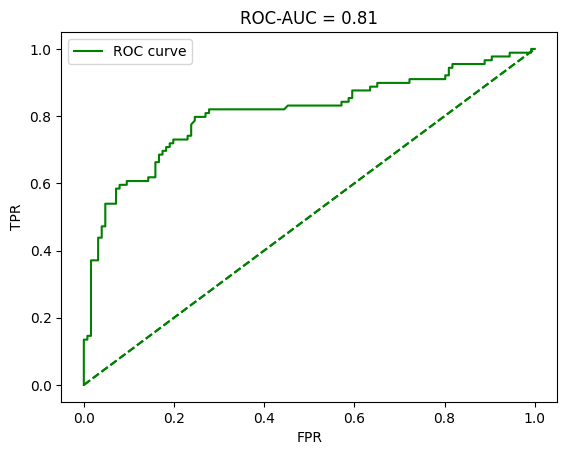

In [81]:
fpr, tpr, thresholds = roc_curve(y_test_titanic, 
                                 model_logreg.predict_proba(X_test_titanic)[:,1])

plt.plot(fpr, tpr, label='ROC curve', color='green')
plt.plot([[0,0],[1,1]], color='green', linestyle='dashed')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'ROC-AUC = {roc_auc:.2f}')

plt.legend()

None

## 3.3. Регрессии с нелинейными фичами

Искусственно создадим нормально распределенный таргет.

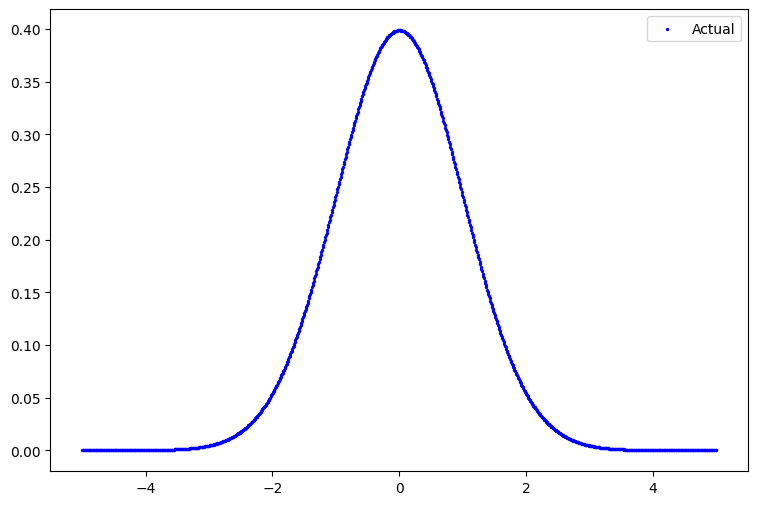

In [82]:
from scipy.stats import norm

feature = np.linspace(-5,5,1000).reshape(-1,1)
target = norm.pdf(feature).reshape(-1,1)

plt.figure(figsize=(9,6))

plt.scatter(feature, target, s=2, color='blue', label='Actual')

plt.legend()

None

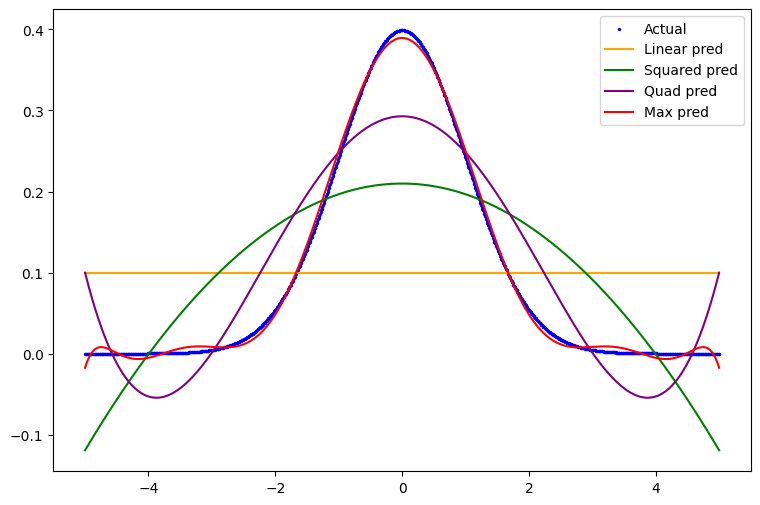

In [83]:
model_linear = LinearRegression()
model_linear.fit(feature, target)
target_pred_linear = model_linear.predict(feature)

model_squared = LinearRegression()
model_squared.fit(np.concatenate([feature, feature**2], axis=1), target)
target_pred_squared = model_squared.predict(np.concatenate([feature, feature**2], axis=1))

model_quad = LinearRegression()
model_quad.fit(np.concatenate([feature, feature**2, feature**4], axis=1), target)
target_pred_quad = model_quad.predict(np.concatenate([feature, feature**2, feature**4], axis=1))

model_max = LinearRegression()
model_max.fit(np.concatenate([feature, feature**2, 
                              feature**4, feature**6, 
                              feature**8, feature**10], axis=1), target)
target_pred_max = model_max.predict(np.concatenate([feature, feature**2, 
                                                    feature**4, feature**6, 
                                                    feature**8, feature**10], axis=1))

plt.figure(figsize=(9,6))

plt.scatter(feature, target, s=2, color='blue', label='Actual')
plt.plot(feature, target_pred_linear, color='orange', label='Linear pred')
plt.plot(feature, target_pred_squared, color='green', label='Squared pred')
plt.plot(feature, target_pred_quad, color='purple', label='Quad pred')
plt.plot(feature, target_pred_max, color='red', label='Max pred')

plt.legend()

None

## 1.4. Метод опорных векторов

Основная идея метода опорных векторов (Support Vector Machine) состоит в том, чтобы между разными классами построить такую разделяющую гипперплоскость, чтобы расстояние от граничных (опорных) векторов до этой гиперплоскости было максимально возможным.

<center> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/600px-SVM_margin.png" width=50%> </center>

In [84]:
from sklearn import svm

### 1.4.1. Регрессия

Более подробно можно прочитать [тут](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)

In [85]:
reg_svm = svm.SVR(kernel='linear')
reg_svm.fit(X_train_hp, y_train_hp)

y_pred_hp_reg_svm = reg_svm.predict(X_test_hp)

print(f'RMSE: {mean_squared_error(y_test_hp, y_pred_hp_reg_svm, squared=False):.2f}')

RMSE: 46544.79


### 1.4.2. Классификация

Более подробно можно прочитать [тут](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [86]:
clf_svm = svm.SVC(kernel='linear', probability=True)
clf_svm.fit(X_train_titanic, y_train_titanic)

y_pred_titanic_clf_svm = clf_svm.predict_proba(X_test_titanic)

roc_auc_svm = roc_auc_score(y_test_titanic, y_pred_titanic_clf_svm[:,1])

print(f'RMSE: {roc_auc_svm:.2f}')

RMSE: 0.82


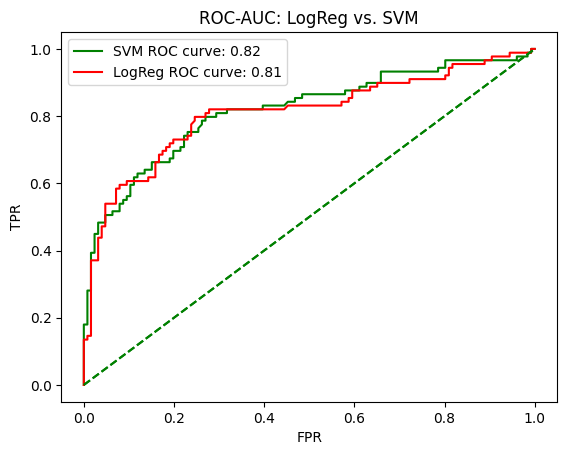

In [87]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_titanic, 
                                             y_pred_titanic_clf_svm[:,1])

plt.plot(fpr_svm, tpr_svm, label=f'SVM ROC curve: {roc_auc_svm:.2f}', color='green')
plt.plot(fpr, tpr, label=f'LogReg ROC curve: {roc_auc:.2f}', color='red')
plt.plot([[0,0],[1,1]], color='green', linestyle='dashed')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'ROC-AUC: LogReg vs. SVM')

plt.legend()

None

**Добавим наглядности и обратимся к излюбленному датасету - к ирисам Фишера**

In [88]:
from sklearn import datasets

iris = datasets.load_iris()

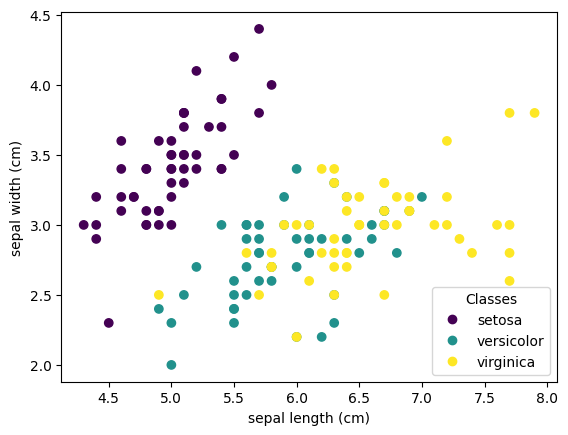

In [89]:
fig, ax = plt.subplots()

scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])

ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

None

Рассмотрим только **sepal length** и **sepal width** и только **setosa** с **versicolor** для простоты и наглядности.

In [90]:
target = iris.target[:100]
feature = iris.data[:100, :2]
names = iris.target_names[:2]
feature_names = iris.feature_names[:2]
target_names = iris.target_names[:2]

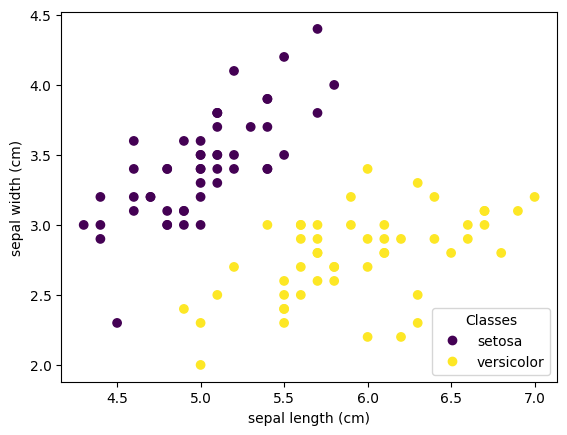

In [91]:
fig, ax = plt.subplots()

scatter = ax.scatter(feature[:,0], feature[:,1], c=target)
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])

ax.legend(scatter.legend_elements()[0], target_names, loc="lower right", title="Classes")

None

Посмотрим на `SVC`:

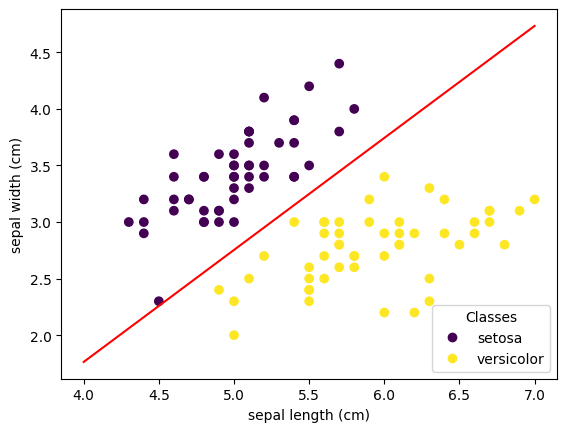

In [92]:
clf_svm_iris = svm.SVC(kernel='linear', probability=True)
clf_svm_iris.fit(feature, target)

w = clf_svm_iris.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(4, 7)
yy = a * xx - (clf_svm_iris.intercept_[0]) / w[1]

fig, ax = plt.subplots()

scatter = ax.scatter(feature[:,0], feature[:,1], c=target)
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])

ax.plot(xx, yy, color='red')

ax.legend(scatter.legend_elements()[0], target_names, loc="lower right", title="Classes")

None

Посмотрим на `kNN`:

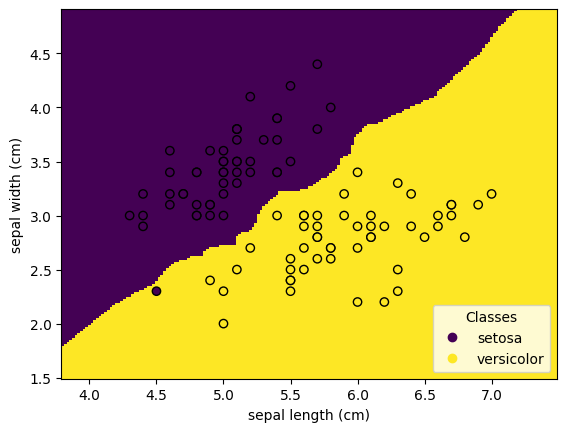

In [93]:
from sklearn import neighbors

h = .02 # step size in the mesh

knn = neighbors.KNeighborsClassifier()

knn.fit(feature, target)

x_min, x_max = feature[:,0].min() - 0.5, feature[:,0].max() + 0.5
y_min, y_max = feature[:,1].min() - 0.5, feature[:,1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()

ax.pcolormesh(xx, yy, Z)

scatter = ax.scatter(feature[:,0], feature[:,1], c=target, edgecolor='black')
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])

ax.legend(scatter.legend_elements()[0], target_names, loc="lower right", title="Classes")

None